In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

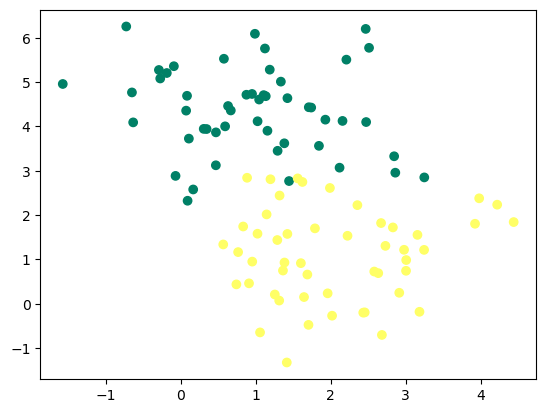

In [215]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [216]:
#initialisation des parametres de notre RN
def initialisation(X): 
     W=np.random.randn(X.shape[1],1)
     b=np.random.randn(1)
     return (W,b)

In [217]:
#la fonction modéle
def model(X, W, b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))

    return A

In [218]:
def predict(X,W,b):
    A=model(X,W,b)
  
    return A >=0.5

In [219]:
#La fonction coût

def log_loss(A,y):
    return 1/len(y)*np.sum(-y * np.log(A)-(1-y) * np.log(1-A))


In [220]:
#La fonction des grandiants pour le backpropagation (optimisation de la fonction coût)

def gradient(A,X,y):
    dw=1/len(y) *  np.dot(X.T, A-y)
    db=1/len(y) * np.sum(A-y)
    return (dw, db)

In [221]:
#La fonction de mise à jour

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db

    return (W , b)



In [222]:
# Construction de notre neurone artificielle
from sklearn.metrics import accuracy_score
def artificial_neurone(X, y, learning_rate=0.1, n_iter=150):
    #initialisatioN, W et b

    W,b=initialisation(X)

    #pour visualiser l'évolution de la fonction coût
    Loss=[]
    for i in range(n_iter):

            A=model(X, W, b)
            Loss.append(log_loss(A,y))
            dW, db=gradient(A,X,y)
            W,b=update(dW,db,W,b,learning_rate)


    y_pred=predict(X,W,b)

    print(accuracy_score(y,y_pred))

    plt.plot(Loss)
    plt.xlabel('itérations')
    plt.ylabel('Loss')
    plt.title("Evolution de la perte en fontion des itérations")
    plt.show()
    
    #pour sauvgarder notre modéle (les paramétres W et b) 
    
    paramétres={'W':W, 'b':b}
    return paramétres


        

     

0.86


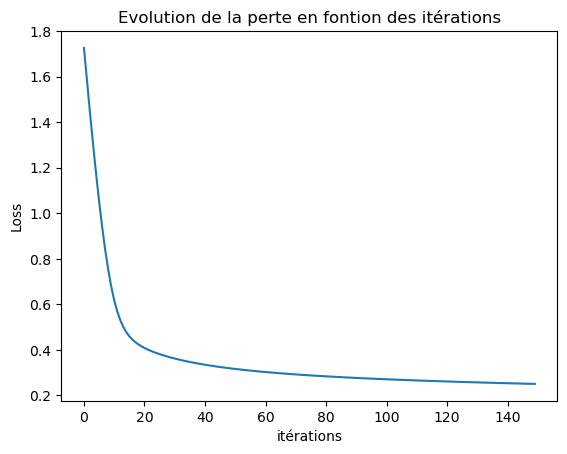

{'W': array([[ 1.50995137],
       [-1.05266368]]), 'b': array([0.06451745])}


In [223]:
print(artificial_neurone(X,y))